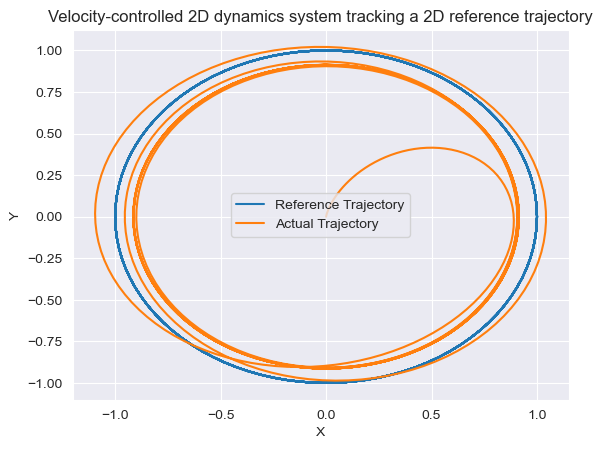

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
dt = 0.01 # timestep
T = 10 # total simulation time
t = np.arange(0, T, dt) # array of simulation times

# Define reference trajectory
ref_x = np.sin(2*np.pi*t) # x-coordinate
ref_vx = np.cos(2*np.pi*t) # x-coordinate

ref_y = np.cos(2*np.pi*t) # y-coordinate
ref_vy = -np.sin(2*np.pi*t) # y-coordinate

# Define initial state
x = 0 # initial x-coordinate
y = 0 # initial y-coordinate
vx = 0 # initial x-velocity
vy = 0 # initial y-velocity

# Define control gains
k_p = 22 # proportional gain
k_v = 3# derivative gain

# Define arrays to store state and control inputs
X = np.zeros((len(t), 2))
U = np.zeros((len(t), 2))

# Simulate system dynamics and control
for i in range(len(t)):
    # Compute control input
    u_x = k_p*(ref_x[i] - x) + k_v*(ref_vx[i] - vx)
    u_y = k_p*(ref_y[i] - y) + k_v*(ref_vy[i] - vy)
    U[i,:] = [u_x, u_y]

    # Update state
    x = x + vx*dt
    y = y + vy*dt
    vx = vx + u_x*dt
    vy = vy + u_y*dt
    X[i,:] = [x, y]

# Plot results
fig, ax = plt.subplots()
ax.plot(ref_x, ref_y, label='Reference Trajectory')
ax.plot(X[:,0], X[:,1], label='Actual Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Velocity-controlled 2D dynamics system tracking a 2D reference trajectory')
ax.legend()
plt.show()

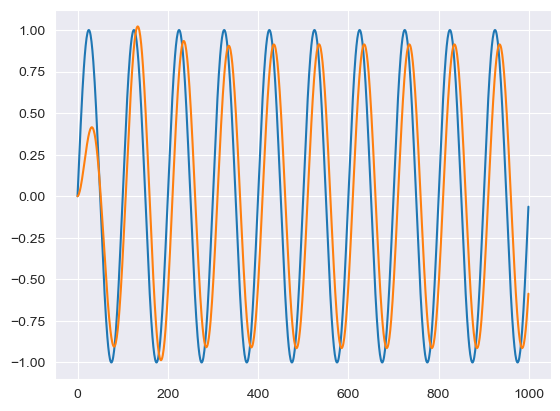

In [43]:
plt.plot(ref_x)
plt.plot(X[:,1])


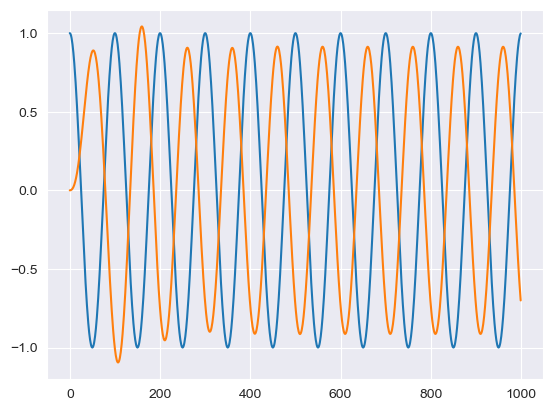

In [44]:
plt.plot(ref_y)
plt.plot(X[:,0])

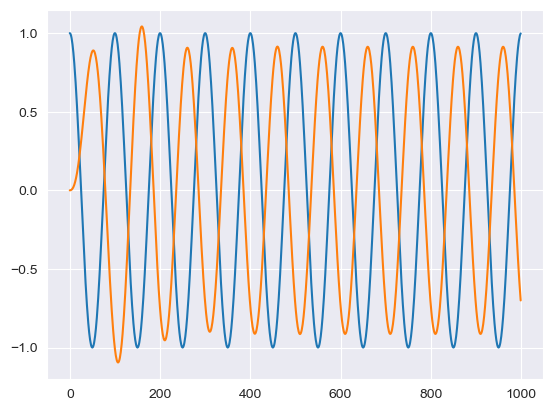

In [45]:
plt.plot(ref_y)
plt.plot(X[:,0])

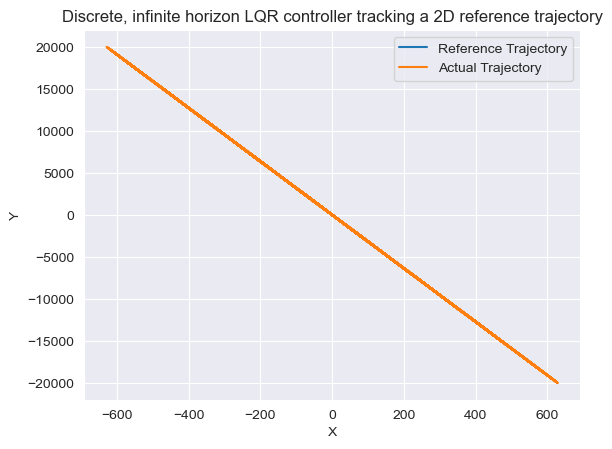

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are as riccati

# Define simulation parameters
dt = 0.01 # timestep
T = 100 # total simulation time
t = np.arange(0, T, dt) # array of simulation times
N = len(t) # number of timesteps

# Define reference trajectory
ref_x = np.sin(2*np.pi*t) # x-coordinate
ref_y = np.cos(2*np.pi*t) # y-coordinate

# Define system dynamics
A = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
B = np.array([[0, 0],
              [0, 0],
              [dt**2, 0],
              [0, dt**2]])
Q = np.diag([1, 1, 0.0, 0.0]) # state cost matrix
R = np.diag([0.1, 0.1]) # control cost matrix

# Compute optimal control gains using LQR
P = riccati(A, B, Q, R)
K = -np.linalg.inv(R) @ B.T @ P

# Define initial state
x = np.array([0, 0, 0, 0]) # initial state

# Define arrays to store state and control inputs
X = np.zeros((N, 4))
U = np.zeros((N, 2))

# Simulate system dynamics and control
for i in range(N):
    # Compute control input
    u = K @ (x - np.array([ref_x[i], ref_y[i], 0, 0]))
    U[i,:] = u

    # Update state
    x = A @ x + B @ u
    X[i,:] = x

# Plot results
fig, ax = plt.subplots()
ax.plot(ref_x, ref_y, label='Reference Trajectory')
ax.plot(X[:,0], X[:,1], label='Actual Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Discrete, infinite horizon LQR controller tracking a 2D reference trajectory')
ax.legend()
plt.show()

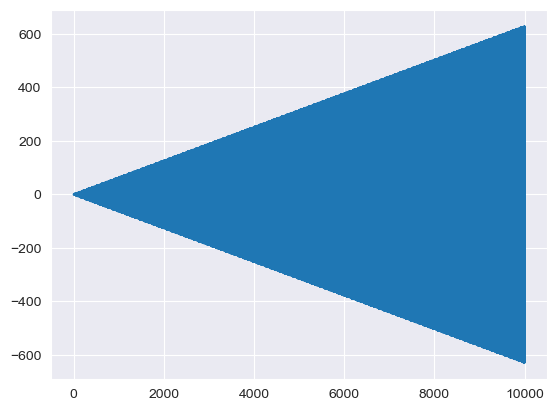

In [85]:
plt.plot(X[:,0])


In [50]:
np.vstack((np.gradient(ref_x, dt), np.gradient(ref_y, dt))).transpose()

array([[ 6.27905195, -0.19732716],
       [ 6.26666168, -0.39426493],
       [ 6.22953975, -0.78697388],
       ...,
       [ 6.16783268,  1.17657701],
       [ 6.22953975,  0.78697388],
       [ 6.2542714 ,  0.59120271]])